<a href="https://colab.research.google.com/github/lin-k23/RISCA/blob/main/risca_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RISCA

## Dependencies

In [57]:
import imp
from preset_mdl import preset_mdl
import preset_mdl
imp.reload(preset_mdl)
from preset_mdl import preset_mdl

from analyser.analyser_new import Analyser
import analyser.analyser_new
imp.reload(analyser.analyser_new)
from analyser.analyser_new import Analyser

In [58]:
!git clone https://github.com/lin-k23/SAR_ADC.git
import pandas as pd
import os
%cd SAR_ADC/script
from preset_mdl import preset_mdl
from preset_pr import preset_pr
from signal_source import signal_source
from RISCA_core import RISCA_core
from analyser.analyser_new import Analyser
from util.load_assembler_xlsx import load_assembler_xlsx
from util.display_dataframe import display_dataframe
from util.select import select

Cloning into 'SAR_ADC'...
remote: Enumerating objects: 564, done.
remote: Counting objects: 100% (564/564), done.
remote: Compressing objects: 100% (335/335), done.
remote: Total 564 (delta 339), reused 451 (delta 226), pack-reused 0 (from 0)
Receiving objects: 100% (564/564), 4.17 MiB | 15.09 MiB/s, done.
Resolving deltas: 100% (339/339), done.
/content/SAR_ADC/script/SAR_ADC/script


In [61]:
mdl = preset_mdl()
mdl


{'n_cb': 6,
 'n_in_bus': 2,
 'n_ana_bus': 2,
 'n_out_bus': 1,
 'n_frame': 16,
 'K': 1.38e-23,
 'T': 300,
 'v_ref': 0.9,
 'n_wgt_sar1': [256, 128, 64, 32, 16],
 'n_wgt_sar2': [16, 8, 4, 2, 1, 0.5],
 'cu_cdac': 2e-15,
 'cu_bridge': 5e-14,
 'n_cu_Cmin1': 5,
 'n_cu_Cmin2': 10,
 'n_cu_Cmaj': 25,
 'nominal_amp_gain': 8,
 'nominal_gm_amp': 0.008,
 'nominal_TIA_gain': 1000.0,
 'par_cmp': 1e-14,
 'par_cbridge_top': 0.05,
 'par_cbridge_bot': 0.1,
 'sgm_vn_cmp': 0.0005,
 'sgm_vn_amp': 5e-05,
 'sgm_vn_amp_lbw': 2.5e-05,
 'sgm_vos_cmp': 0.001,
 'sgm_vos_amp': 0.001,
 'a_nl2_amp': -60,
 'a_nl3_amp': -60,
 'is_nonideal': 1,
 'is_verbose': 0,
 'en_noi_cdac': 1,
 'en_noi_cmp': 1,
 'en_noi_amp': 1,
 'en_noi_cfb': 1,
 'en_os_cmp': 1,
 'en_os_amp': 1,
 'en_chs_error': 1}

## Set Parameters

In [62]:
mdl = preset_mdl()
pr = preset_pr()
Mode='Single-Channel SAR' # @param ['Single-Channel SAR', '3xTI-SAR', '2-stage Pipe-Sar', '1st-order NS-SAR', '1st-order NS-SAR(with chopping)','3-stage Pipe-Sar'] {type:'string'}
pr['conf_name']=select(Mode)
pr['N_fft']=1024

## Run Simulator

In [64]:
mdl = preset_mdl()
pr = preset_pr()
Mode='Single-Channel SAR' # @param ['Single-Channel SAR', '3xTI-SAR', '2-stage Pipe-Sar', '1st-order NS-SAR', '1st-order NS-SAR(with chopping)','3-stage Pipe-Sar'] {type:'string'}
pr['conf_name']=select(Mode)
pr['N_fft']=1024
pr_loaded = load_assembler_xlsx(os.path.join("../config",pr['conf_name']))
pr.update(pr_loaded)
cfg_info = pd.DataFrame(pr["conf_table"])
display_dataframe(cfg_info,pr["conf_name"])

Loading file: ../config/sar/timing_table.xlsx


,Frame1,Frame2,Frame3
Item,,,
CB1,OUT RST SAM1,MSB,LSB
CB2,nan,nan,nan
CB3,nan,nan,nan
CB4,nan,nan,nan
CB5,nan,nan,nan
CB6,nan,nan,nan


Output spectrum


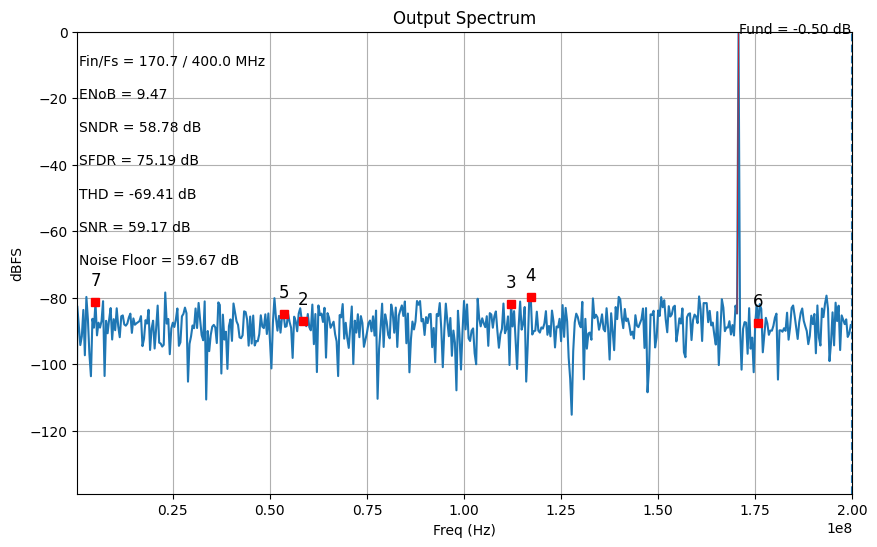

In [65]:
da = RISCA_core(mdl, pr, signal_source(pr, mdl))
print("Output spectrum")
test = Analyser(da, pr, mdl)
test.mode_analyser()

## Single-Channel SAR

**Array Usage**

<figure>
  <img src="https://i.imgur.com/ZRyqsSs.png" width="600"/>
</figure>



In [66]:
mdl = preset_mdl()
pr = preset_pr()
Mode='Single-Channel SAR' # @param ['Single-Channel SAR', '3xTI-SAR', '2-stage Pipe-Sar', '1st-order NS-SAR', '1st-order NS-SAR(with chopping)','3-stage Pipe-Sar'] {type:'string'}
pr['conf_name']=select(Mode)
pr['N_fft']=1024
pr_loaded = load_assembler_xlsx(os.path.join("../config",pr['conf_name']))
pr.update(pr_loaded)
cfg_info = pd.DataFrame(pr["conf_table"])
display_dataframe(cfg_info,pr["conf_name"])

Loading file: ../config/sar/timing_table.xlsx


,Frame1,Frame2,Frame3
Item,,,
CB1,OUT RST SAM1,MSB,LSB
CB2,nan,nan,nan
CB3,nan,nan,nan
CB4,nan,nan,nan
CB5,nan,nan,nan
CB6,nan,nan,nan


Output Spectrum


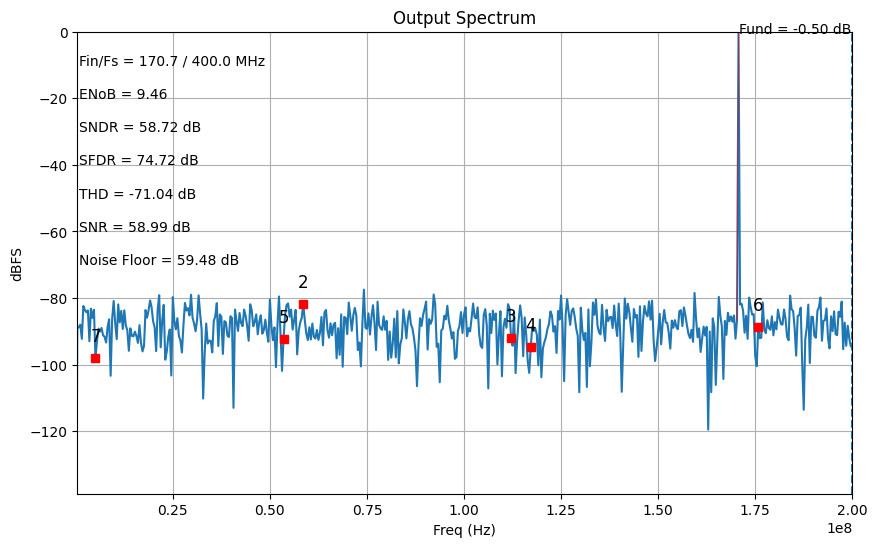

In [67]:
da = RISCA_core(mdl, pr, signal_source(pr, mdl))
test = Analyser(da, pr, mdl)
print("Output Spectrum")
test.mode_analyser()

## Multitasking_sarx2

**Array Usage**

<figure>
  <img src="https://i.imgur.com/4guQ7tR.png" width="600"/>
</figure>

## Sar4x

**Array Usage**

<figure>
  <img src="https://i.imgur.com/f21npca.png" width="600"/>
</figure>

## 3xTI-SAR

**Array Usage**

<figure>
  <img src="https://i.imgur.com/DnGDcA5.png" width="600"/>
</figure>

In [69]:
mdl = preset_mdl()
pr = preset_pr()
Mode='3xTI-SAR' # @param ['Single-Channel SAR', '3xTI-SAR', '2-stage Pipe-Sar', '1st-order NS-SAR', '1st-order NS-SAR(with chopping)','3-stage Pipe-Sar'] {type:'string'}
pr['conf_name']=select(Mode)
pr['N_fft']=1024
pr_loaded = load_assembler_xlsx(os.path.join("../config",pr['conf_name']))
pr.update(pr_loaded)
cfg_info = pd.DataFrame(pr["conf_table"])
display_dataframe(cfg_info,pr["conf_name"])

Loading file: ../config/tisar/timing_table.xlsx


,Frame1,Frame2,Frame3
Item,,,
CB1,OUT RST SAM1,MSB,LSB
CB2,LSB,OUT RST SAM1,MSB
CB3,MSB,LSB,OUT RST SAM1
CB4,nan,nan,nan
CB5,nan,nan,nan
CB6,nan,nan,nan


Output Spectrum


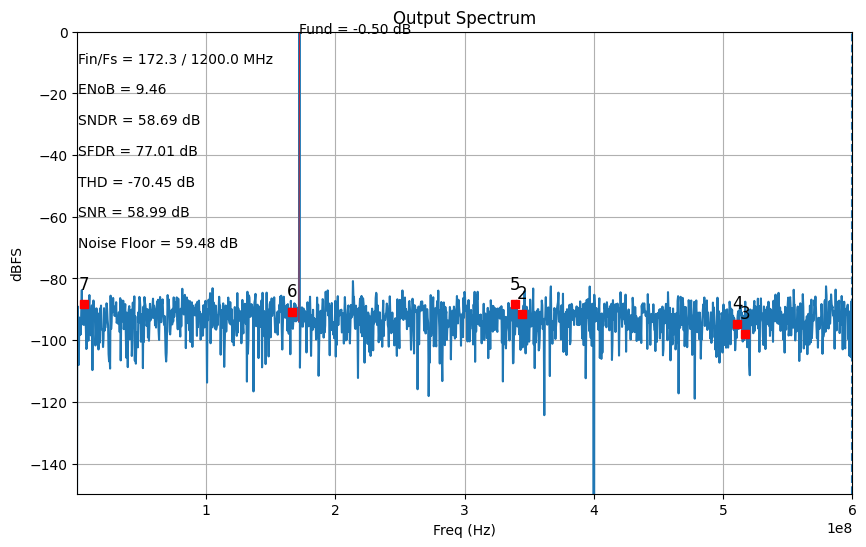

In [70]:
da = RISCA_core(mdl, pr, signal_source(pr, mdl))
print("Output Spectrum")
test = Analyser(da, pr, mdl)
test.mode_analyser()

## 2-stage Pipe-Sar

**Array Usage**

<figure>
  <img src="https://i.imgur.com/bkj8NjW.png" width="600"/>
</figure>

In [73]:
mdl = preset_mdl()
pr = preset_pr()
Mode='2-stage Pipe-Sar' # @param ['Single-Channel SAR', '3xTI-SAR', '2-stage Pipe-Sar', '1st-order NS-SAR', '1st-order NS-SAR(with chopping)','3-stage Pipe-Sar'] {type:'string'}
pr['conf_name']=select(Mode)
pr['N_fft']=1024
pr_loaded = load_assembler_xlsx(os.path.join("../config",pr['conf_name']))
pr.update(pr_loaded)
cfg_info = pd.DataFrame(pr["conf_table"])
display_dataframe(cfg_info,pr["conf_name"])

Loading file: ../config/pipesar2s/timing_table.xlsx


,Frame1,Frame2,Frame3
Item,,,
CB1,OUT RST SAM1,MSB,AMP1
CB2,MSB,LSB,OUT RST SAM0 F1P0
CB3,nan,nan,nan
CB4,nan,nan,nan
CB5,nan,nan,nan
CB6,nan,nan,nan


Output Spectrum
12.114861667877706 74.6914672406238 90.06862295851165 74.97211208514712 -86.7273064699274 -1.0456957218260836 76.0178078069732 Axes(0.125,0.11;0.775x0.77)


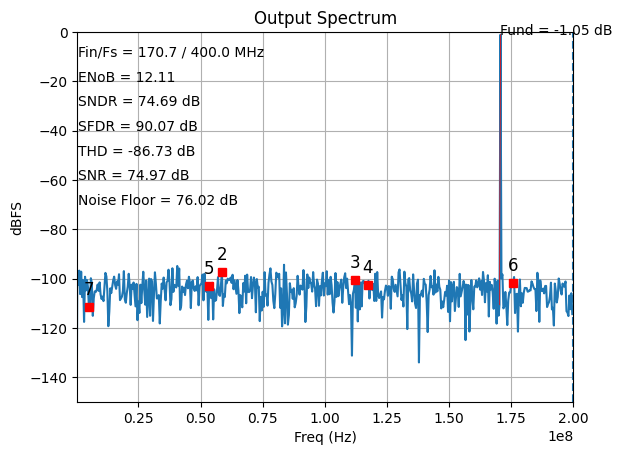

In [74]:
da = RISCA_core(mdl, pr, signal_source(pr, mdl))
print("Output Spectrum")
test = Analyser(da, pr, mdl)
test.mode_analyser()

## 3-stage Pipe-Sar

**Array Usage**

<figure>
  <img src="https://i.imgur.com/LfVP8de.png" width="600"/>
</figure>

In [75]:
mdl = preset_mdl()
pr = preset_pr()
Mode='3-stage Pipe-Sar' # @param ['Single-Channel SAR', '3xTI-SAR', '2-stage Pipe-Sar', '1st-order NS-SAR', '1st-order NS-SAR(with chopping)','3-stage Pipe-Sar'] {type:'string'}
pr['conf_name']=select(Mode)
pr['F_in_center_1']=170e6
pr['N_fft']=8192
pr_loaded = load_assembler_xlsx(os.path.join("../config",pr['conf_name']))
pr.update(pr_loaded)
cfg_info = pd.DataFrame(pr["conf_table"])
display_dataframe(cfg_info,pr["conf_name"])

Loading file: ../config/pipesar3shp/timing_table.xlsx


,frame1,frame2,frame3,frame4,frame5
Item,,,,,
CB1,OUT RST SAM1,MSB,AMP1,AMP1,nan
CB2,AMP1,AMP1,OUT RST SAM0 F1P0,SAM0 F1P0,MSB
CB3,SAM0 F1P0,SAM0 F1P0,MSB,LSB,OUT RST
CB4,nan,nan,nan,nan,nan
CB5,nan,nan,nan,nan,nan
CB6,nan,nan,nan,nan,nan


Output Spectrum
12.721933992167614 78.34604263284903 93.91009150920243 78.63853030602112 -90.20823317144148 -1.112185362216991 79.75071566823812 Axes(0.125,0.11;0.775x0.77)


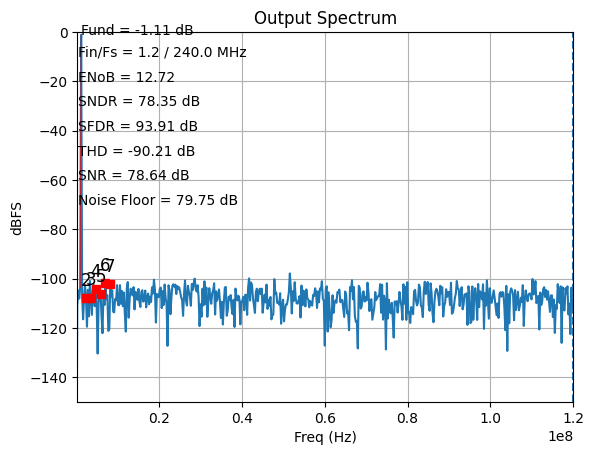

In [76]:
da = RISCA_core(mdl, pr, signal_source(pr, mdl))
print("Output Spectrum")
test = Analyser(da, pr, mdl)
test.mode_analyser()

## 1st-order NS-SAR(with chopping)

**Array Usage**

<figure>
  <img src="https://i.imgur.com/lp6MLIP.png" width="600"/>
</figure>

In [80]:
mdl = preset_mdl()
pr = preset_pr()
Mode='1st-order NS-SAR(with chopping)' # @param ['Single-Channel SAR', '3xTI-SAR', '2-stage Pipe-Sar', '1st-order NS-SAR', '1st-order NS-SAR(with chopping)','3-stage Pipe-Sar'] {type:'string'}
pr['conf_name']=select(Mode)
pr['N_fft']=1024
pr_loaded = load_assembler_xlsx(os.path.join("../config",pr['conf_name']))
pr.update(pr_loaded)
cfg_info = pd.DataFrame(pr["conf_table"])
display_dataframe(cfg_info,pr["conf_name"])

Loading file: ../config/nssar1o1ccp/timing_table.xlsx


,Frame1,Frame2,Frame3,Frame4,Frame5,Frame6,Frame7,Frame8
Item,,,,,,,,
CB1,OUT RST RMAJ RMIN2 SAM1F,MSB CHS12,LSB,AMP0 F0N1,OUT RST RMAJ RMIN2 SAM1,MSB CHS12,LSB,AMP0 F0N1
CB2,nan,nan,nan,nan,nan,nan,nan,nan
CB3,nan,nan,nan,nan,nan,nan,nan,nan
CB4,nan,nan,nan,nan,nan,nan,nan,nan
CB5,nan,nan,nan,nan,nan,nan,nan,nan
CB6,nan,nan,nan,nan,nan,nan,nan,nan


/content/SAR_ADC/script/util/specPlot.py:244: RuntimeWarning: divide by zero encountered in log10
  (h,) = plt.semilogx(freq, 10 * np.log10(spec))


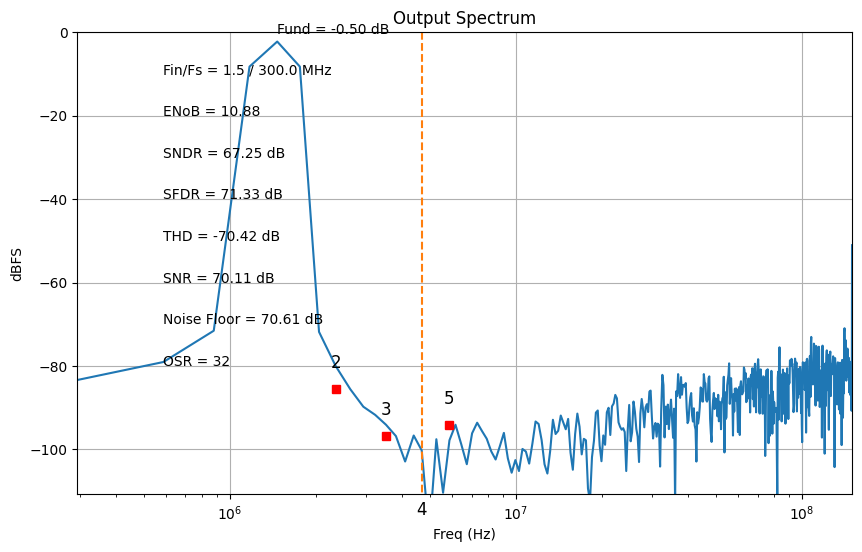

In [81]:
da = RISCA_core(mdl, pr, signal_source(pr, mdl))
test = Analyser(da, pr, mdl)
test.mode_analyser()